In [ ]:
# Auto_encoder 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import keras
from keras import layers 

# mnist 데이터 불러오기 

from keras.datasets import mnist 

In [ ]:
(x_train, _), (x_test,_) = mnist.load_data()
# 이미지만 사용 

# 0과 1 사이로 정규화 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train.shape[1:]

(28, 28)

In [ ]:
np.prod(x_train.shape[1:])

784

In [ ]:
x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Auto_encoder 모델 생성 

# encoding 되는 차원의 수 
encoding_dim = 32

# input layer
input_img = keras.Input(shape=(784,))

# hidden layer (784 dimension >> 32 dimension)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# output layer (32 dimension >> 784 dimension)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# autoencoder 모델 
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# auto_encoder 학습 

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# 적합(훈련용 데이터 활용)
autoencoder.fit(x_train, x_train, 
                epochs=20,
                batch_size=256,
                shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 6s 5ms/step - loss: 0.2763 - val_loss: 0.1921
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1708 - val_loss: 0.1521
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1435 - val_loss: 0.1334
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1284 - val_loss: 0.1210
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1181 - val_loss: 0.1127
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1110 - val_loss: 0.1068
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1061 - val_loss: 0.1027
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.1026 - val_loss: 0.0997
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0999 - val_loss: 0.0974
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0979 - val_loss: 0.0959

In [ ]:
# 학습결과 확인 
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 1ms/step


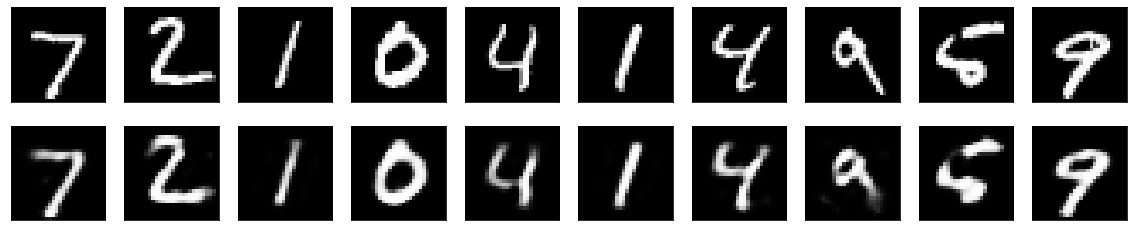

In [ ]:
n = 10 # 보여주고 싶은 그림 수 

plt.figure(figsize=(20,4))
for i in range(n): 
  # 원래 이미지 
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # 복원된 이미지 
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
 
plt.show()